In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#IMPORT THE DATA FILE TITLED CARS.CSV USING THIS PANDAS METHOD
cars = pd.read_csv('CARS.csv')

In [16]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [17]:
cars.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [5]:
#CLEAN THE MSRP DATA 
cars['MSRP'] = cars['MSRP'].str.replace('$','')
cars['MSRP'] = cars['MSRP'].str.replace(',','')#TURN THE MSRP INTO AN INT AND TRY AGAIN

In [6]:
cars['MSRP'].head()

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

<AxesSubplot:>

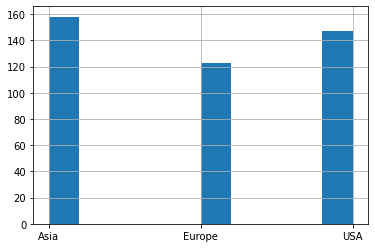

In [3]:
cars['Origin'].hist()

<AxesSubplot:>

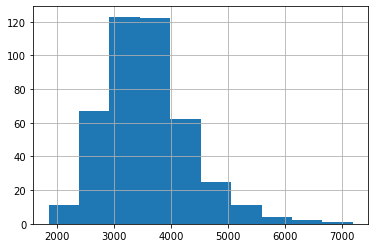

In [4]:
cars['Weight'].hist()

In [24]:
x = np.array([cars['MSRP']]).reshape((-1,1))
y = cars['EngineSize']

In [25]:
model = LinearRegression().fit(x,y)

In [30]:
r_sq = model.score(x,y)
print('R square is:',r_sq)

R square is: 0.3269014493803979


In [31]:
print('The intercept is:', model.intercept_)

The intercept is: 2.1276474099871847


In [32]:
print('slope:', model.coef_)

slope: [3.26189561e-05]


In [37]:
OLS(x,y).fit().summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).